In [115]:
!pip install -q mrjob

In [21]:
import csv
import pandas as pd

from matplotlib import pyplot as plt
from mrjob.job import MRStep, MRJob

### Подготовка датасета

In [109]:
!python3 count.py SW_EpisodeIV.txt > SW_EpisodeIV.csv
!python3 count.py SW_EpisodeV.txt > SW_EpisodeV.csv
!python3 count.py SW_EpisodeVI.txt > SW_EpisodeVI.csv

No configs found; falling back on auto-configuration
No configs specified for inline runner
Creating temp directory /tmp/count.root.20240206.220456.559253
Running step 1 of 2...
Running step 2 of 2...
job output is in /tmp/count.root.20240206.220456.559253/output
Streaming final output from /tmp/count.root.20240206.220456.559253/output...
Removing temp directory /tmp/count.root.20240206.220456.559253...
No configs found; falling back on auto-configuration
No configs specified for inline runner
Creating temp directory /tmp/count.root.20240206.220457.166533
Running step 1 of 2...
Running step 2 of 2...
job output is in /tmp/count.root.20240206.220457.166533/output
Streaming final output from /tmp/count.root.20240206.220457.166533/output...
Removing temp directory /tmp/count.root.20240206.220457.166533...
No configs found; falling back on auto-configuration
No configs specified for inline runner
Creating temp directory /tmp/count.root.20240206.220457.743978
Running step 1 of 2...
Running 

In [110]:
df1 = pd.read_csv('SW_EpisodeIV.csv', sep="\t", names=['character', 'phrases_count'], nrows=20)
print("\nSW_EpisodeIV\n", df1)
df2 = pd.read_csv('SW_EpisodeV.csv', sep="\t", names=['character', 'phrases_count'], nrows=20)
print("\nSW_EpisodeV\n", df2)
df3 = pd.read_csv('SW_EpisodeVI.csv', sep="\t", names=['character', 'phrases_count'], nrows=20)
print("\nSW_EpisodeVI\n", df3)

df_all = pd.concat([df1, df2, df3])
df = df_all.groupby("character")['phrases_count'].sum().sort_values(ascending=False)[:20]


SW_EpisodeIV
    character  phrases_count
0       luke            254
1        han            153
2   threepio            119
3        ben             82
4       leia             57
5        red             49
6      vader             41
7      biggs             34
8     tarkin             28
9       owen             25
10      gold             23
11   trooper             20
12     wedge             14
13   officer             12
14     first              7
15     jabba              6
16  intercom              6
17    greedo              6
18   dodonna              6
19     death              6

SW_EpisodeV
    character  phrases_count
0        han            182
1       luke            128
2       leia            114
3   threepio             92
4      lando             61
5      vader             56
6       yoda             36
7      piett             23
8   creature             21
9        ben             15
10   rieekan             13
11     wedge              8
12     veers       

<Axes: title={'center': 'Most talkers in SW_EpisodeV'}, xlabel='character'>

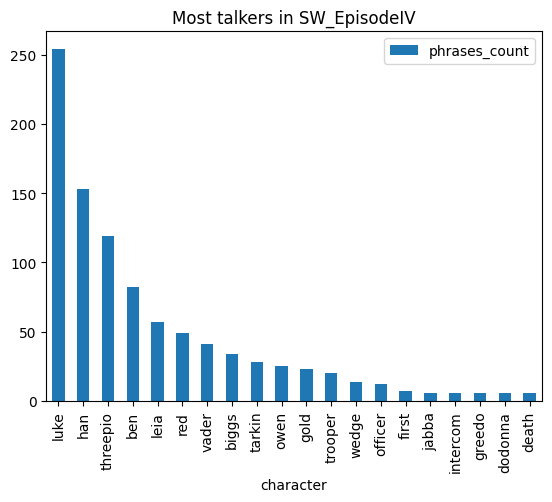

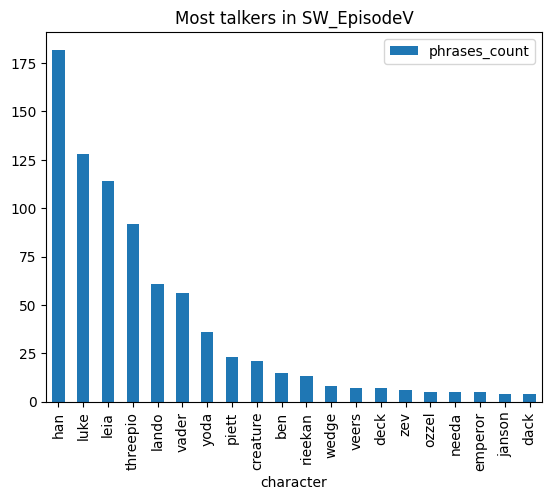

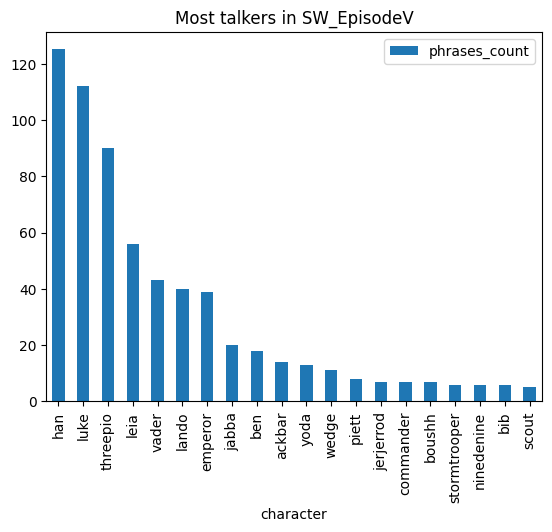

In [113]:
df1.plot(kind='bar',  x='character', y='phrases_count', title='Most talkers in SW_EpisodeIV')
df2.plot(kind='bar',  x='character', y='phrases_count', title='Most talkers in SW_EpisodeV')
df3.plot(kind='bar',  x='character', y='phrases_count', title='Most talkers in SW_EpisodeV')

<Axes: title={'center': 'Most talkers in SW_Episodes IV-VI'}, xlabel='character'>

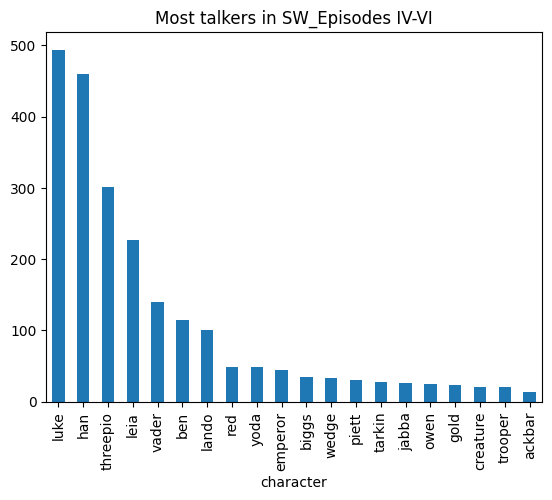

In [114]:
df.plot(kind='bar',  x='character', y='phrases_count', title='Most talkers in SW_Episodes IV-VI')

## Исполним на кластере

In [70]:
!hadoop fs -put SW_EpisodeIV.txt /hw1
!hadoop fs -put SW_EpisodeV.txt /hw1
!hadoop fs -put SW_EpisodeVI.txt /hw1

In [85]:
!python3 count.py -r hadoop hdfs://namenode:8020/hw1/SW_EpisodeIV.txt --conf-path cfg.conf --output /hw1/episode_4

Looking for hadoop binary in /opt/hadoop/bin...
Found hadoop binary: /opt/hadoop/bin/hadoop
Using Hadoop version 3.3.6
Looking for Hadoop streaming jar in /opt/hadoop...
Found Hadoop streaming jar: /opt/hadoop/share/hadoop/tools/lib/hadoop-streaming-3.3.6.jar
Creating temp directory /tmp/count.root.20240206.215414.888552
uploading working dir files to hdfs:///user/root/tmp/mrjob/count.root.20240206.215414.888552/files/wd...
Copying other local files to hdfs:///user/root/tmp/mrjob/count.root.20240206.215414.888552/files/
Running step 1 of 2...
  packageJobJar: [/tmp/hadoop-unjar3921835378177127367/] [] /tmp/streamjob2009581943772268610.jar tmpDir=null
  Connecting to ResourceManager at resourcemanager/172.18.0.3:8032
  Connecting to ResourceManager at resourcemanager/172.18.0.3:8032
  Disabling Erasure Coding for path: /tmp/hadoop-yarn/staging/root/.staging/job_1707060155216_0010
  Total input files to process : 1
  number of splits:2
  Submitting tokens for job: job_1707060155216_0010


In [83]:
!python3 count.py -r hadoop hdfs://namenode:8020/hw1/SW_EpisodeV.txt --conf-path cfg.conf --output /hw1/episode5

Looking for hadoop binary in /opt/hadoop/bin...
Found hadoop binary: /opt/hadoop/bin/hadoop
Using Hadoop version 3.3.6
Looking for Hadoop streaming jar in /opt/hadoop...
Found Hadoop streaming jar: /opt/hadoop/share/hadoop/tools/lib/hadoop-streaming-3.3.6.jar
Creating temp directory /tmp/count.root.20240206.215056.555968
uploading working dir files to hdfs:///user/root/tmp/mrjob/count.root.20240206.215056.555968/files/wd...
Copying other local files to hdfs:///user/root/tmp/mrjob/count.root.20240206.215056.555968/files/
Running step 1 of 2...
  packageJobJar: [/tmp/hadoop-unjar9188831804724990479/] [] /tmp/streamjob7253644730990481254.jar tmpDir=null
  Connecting to ResourceManager at resourcemanager/172.18.0.3:8032
  Connecting to ResourceManager at resourcemanager/172.18.0.3:8032
  Disabling Erasure Coding for path: /tmp/hadoop-yarn/staging/root/.staging/job_1707060155216_0006
  Total input files to process : 1
  number of splits:2
  Submitting tokens for job: job_1707060155216_0006


In [84]:
!python3 count.py -r hadoop hdfs://namenode:8020/hw1/SW_EpisodeVI.txt --conf-path cfg.conf --output /hw1/episode6

Looking for hadoop binary in /opt/hadoop/bin...
Found hadoop binary: /opt/hadoop/bin/hadoop
Using Hadoop version 3.3.6
Looking for Hadoop streaming jar in /opt/hadoop...
Found Hadoop streaming jar: /opt/hadoop/share/hadoop/tools/lib/hadoop-streaming-3.3.6.jar
Creating temp directory /tmp/count.root.20240206.215225.004485
uploading working dir files to hdfs:///user/root/tmp/mrjob/count.root.20240206.215225.004485/files/wd...
Copying other local files to hdfs:///user/root/tmp/mrjob/count.root.20240206.215225.004485/files/
Running step 1 of 2...
  packageJobJar: [/tmp/hadoop-unjar7829469008976774127/] [] /tmp/streamjob6651524331179037976.jar tmpDir=null
  Connecting to ResourceManager at resourcemanager/172.18.0.3:8032
  Connecting to ResourceManager at resourcemanager/172.18.0.3:8032
  Disabling Erasure Coding for path: /tmp/hadoop-yarn/staging/root/.staging/job_1707060155216_0008
  Total input files to process : 1
  number of splits:2
  Submitting tokens for job: job_1707060155216_0008


### Проверка корректности результата

In [128]:
!hadoop fs -cat /hw1/episode_4/part-00000

"luke"	254
"han"	153
"threepio"	119
"ben"	82
"leia"	57
"red"	49
"vader"	41
"biggs"	34
"tarkin"	28
"owen"	25
"gold"	23
"trooper"	20
"wedge"	14
"officer"	12
"first"	7
"jabba"	6
"intercom"	6
"greedo"	6
"dodonna"	6
"death"	6


In [125]:
!hadoop fs -cat /hw1/episode5/part-00000

"han"	182
"luke"	128
"leia"	114
"threepio"	92
"lando"	61
"vader"	56
"yoda"	36
"piett"	23
"creature"	21
"ben"	15
"rieekan"	13
"wedge"	8
"veers"	7
"deck"	7
"zev"	6
"ozzel"	5
"needa"	5
"emperor"	5
"janson"	4
"dack"	4


In [126]:
!hadoop fs -cat /hw1/episode6/part-00000

"han"	125
"luke"	112
"threepio"	90
"leia"	56
"vader"	43
"lando"	40
"emperor"	39
"jabba"	20
"ben"	18
"ackbar"	14
"yoda"	13
"wedge"	11
"piett"	8
"jerjerrod"	7
"commander"	7
"boushh"	7
"stormtrooper"	6
"ninedenine"	6
"bib"	6
"scout"	5


### Листинги

In [129]:
!echo "\n========== Config: ==========="
!cat cfg.conf
!echo "\n========== Count:  ==========="
!cat count.py


========== Config: ===========
runners:
  hadoop:
    jobconf:
      mapreduce.job.reduces: 2
========== Count:  ===========
from mrjob.job import MRStep, MRJob

class PhraseCount(MRJob):
    def map(self, _, line):
        parsed = (line.lower()).replace('"', '').split()[1:]
        yield parsed[0], 1

    def reduce(self, characters, values):
        yield characters, sum(values)

    def map_best(self, characters, count):
        yield None, (count, characters)

    def reduce_best(self, _, phrases_count):
        for count, characters in sorted(phrases_count, reverse=True)[:20]:
            yield characters, count

    def steps(self):
        return [
            MRStep(mapper=self.map, reducer=self.reduce),
            MRStep(mapper=self.map_best, reducer=self.reduce_best)
        ]


if __name__ == "__main__":
    PhraseCount.run()